In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url='https://drive.google.com/file/d/1VnVh7a-XExW4MFW6z1LPnS-aZFl-uvBU/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

**Text Preprocessing**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
text = list(df['review'])
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    #r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)
df['review'] = corpus
df

,review,sentiment
0,one of the other reviewer ha mentioned that af...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this wa a wonderful way to spend tim...,positive
3,basically there s a family where a little boy ...,negative
4,petter mattei s love in the time of money is a...,positive
...,...,...
49995,i thought this movie did a down right good job...,positive
49996,bad plot bad dialogue bad acting idiotic direc...,negative
49997,i am a catholic taught in parochial elementary...,negative
49998,i m going to have to disagree with the previou...,negative


In [ ]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [ ]:
dit={}
x=0
for i in df.sentiment:
    if i not in dit:
        dit[i]=x
        x+=1
df.sentiment=df.sentiment.map(dit)
print(dit)

{'positive': 0, 'negative': 1}


In [ ]:
df

,review,sentiment
0,one of the other reviewer ha mentioned that af...,0
1,a wonderful little production br br the filmin...,0
2,i thought this wa a wonderful way to spend tim...,0
3,basically there s a family where a little boy ...,1
4,petter mattei s love in the time of money is a...,0
...,...,...
49995,i thought this movie did a down right good job...,0
49996,bad plot bad dialogue bad acting idiotic direc...,1
49997,i am a catholic taught in parochial elementary...,1
49998,i m going to have to disagree with the previou...,1


In [ ]:
from sklearn.model_selection import train_test_split
X = df.review
y = df.sentiment
X1_train, X1_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# **Question 1.**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X_train = cv.fit_transform(X1_train)
X_test = cv.transform(X1_test)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
def make_confusion_matrix(cf_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                        cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
X = ['Accuracy','Macro F1-Score']
Y = []
Z = []
X_axis = np.arange(len(X))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

NameError: ignored

Accuracy: 0.8948
Precision: 0.9027496967246259
Recall: 0.8866163621922161
f1_score: 0.8946102985373673

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      4964
           1       0.90      0.89      0.89      5036

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



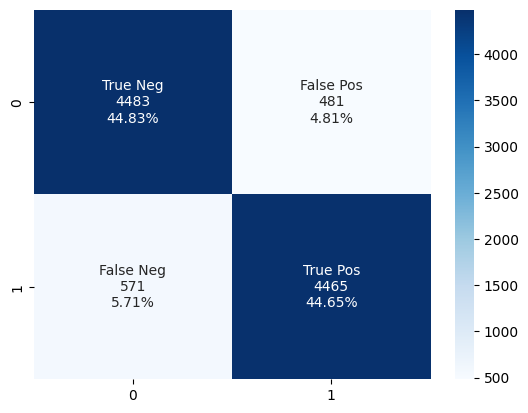

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print('\nClassification Report')
print(classification_report(y_test, y_pred))
Y+=[metrics.accuracy_score(y_test, y_pred)]
Y+=[metrics.f1_score(y_test, y_pred,average='macro')]
c1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(c1)

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Accuracy: 0.8583
Precision: 0.8446010283755475
Recall: 0.880659253375695
f1_score: 0.8622533294449306

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      4964
           1       0.84      0.88      0.86      5036

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



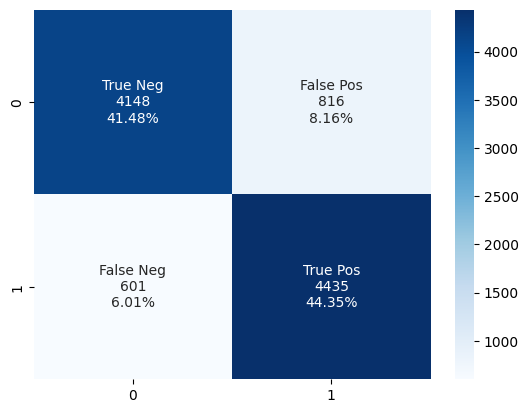

In [ ]:
from nltk.corpus.reader.bracket_parse import ZipFilePathPointer
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print('\nClassification Report')
print(classification_report(y_test, y_pred))
Z+=[metrics.accuracy_score(y_test, y_pred)]
Z+=[metrics.f1_score(y_test, y_pred,average='macro')]
c1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(c1)

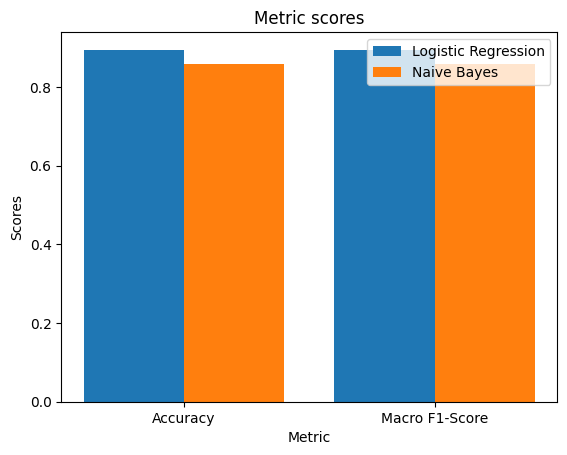

In [ ]:
plt.bar(X_axis - 0.2, Y, 0.4, label = 'Logistic Regression')
plt.bar(X_axis + 0.2, Z, 0.4, label = 'Naive Bayes')

plt.xticks(X_axis, X)
plt.xlabel("Metric")
plt.ylabel("Scores")
plt.title("Metric scores")
plt.legend()
plt.show()

Comparing Logistic Regression and Naive Bayes, Logistic Regression out-performed Naive Bayes with an accuracy of 89.5% against an accuracy of 85.8% for Naive Bayes. For the Macro F1-Score, Logistic Regression also out-performed Naive Bayes with a score of 89.4% against 86.2% of Naive Bayes.

# **Question 2.**

**Deep Learning Model**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [ ]:
# Download the GloVe embeddings file
!wget https://nlp.stanford.edu/data/glove.6B.zip

# Unzip the file
!unzip glove.6B.zip -d glove.6B

--2023-05-02 15:36:02--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-02 15:36:02--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2023-05-02 15:38:41 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B/glove.6B.50d.txt  
  inflating: glove.6B/glove.6B.100d.txt  
  i

In [ ]:
# Tokenize the texts and pad them to a fixed length
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X1_train)
train_sequences = tokenizer.texts_to_sequences(X1_train)
test_sequences = tokenizer.texts_to_sequences(X1_test)
train_data = pad_sequences(train_sequences, maxlen=100)
test_data = pad_sequences(test_sequences, maxlen=100)

In [ ]:
embeddings_index = {}
with open('/content/glove.6B/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
model = Sequential()
model.add(Embedding(10000, 100, input_length=100))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, y_train, epochs=50, batch_size=50, validation_split=0.1)
y_pred = model.predict(test_data)
y_pred = np.round(y_pred)

Epoch 1/50
720/720 [==============================] - 75s 101ms/step - loss: 0.3963 - accuracy: 0.8192 - val_loss: 0.3469 - val_accuracy: 0.8495
Epoch 2/50
720/720 [==============================] - 66s 92ms/step - loss: 0.2731 - accuracy: 0.8879 - val_loss: 0.3580 - val_accuracy: 0.8535
Epoch 3/50
720/720 [==============================] - 71s 98ms/step - loss: 0.2143 - accuracy: 0.9147 - val_loss: 0.3851 - val_accuracy: 0.8575
Epoch 4/50
720/720 [==============================] - 67s 93ms/step - loss: 0.1645 - accuracy: 0.9364 - val_loss: 0.4357 - val_accuracy: 0.8440
Epoch 5/50
720/720 [==============================] - 67s 93ms/step - loss: 0.1282 - accuracy: 0.9516 - val_loss: 0.5364 - val_accuracy: 0.8397
Epoch 6/50
720/720 [==============================] - 69s 96ms/step - loss: 0.1015 - accuracy: 0.9626 - val_loss: 0.5031 - val_accuracy: 0.8395
Epoch 7/50
720/720 [==============================] - 73s 101ms/step - loss: 0.0834 - accuracy: 0.9704 - val_loss: 0.5727 - val_accurac

Accuracy: 0.8312
Precision: 0.8515329693406132
Recall: 0.8052025416997617
f1_score: 0.8277199428454788

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      4964
           1       0.85      0.81      0.83      5036

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



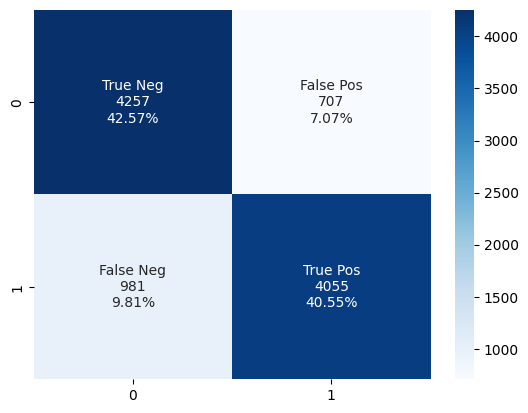

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("f1_score:",metrics.f1_score(y_test, y_pred))
print('\nClassification Report')
print(classification_report(y_test, y_pred))
c1 = confusion_matrix(y_test, y_pred)
make_confusion_matrix(c1)

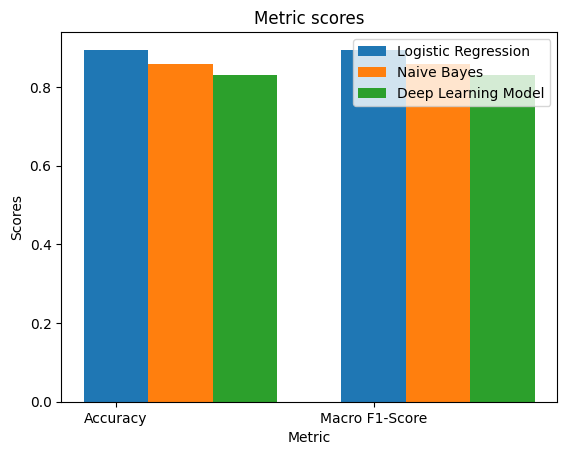

In [ ]:
X = ['Accuracy','Macro F1-Score']
A = []
A+=[metrics.accuracy_score(y_test, y_pred)]
A+=[metrics.f1_score(y_test, y_pred,average='macro')]
X_axis = np.arange(len(X))
plt.bar(X_axis, Y, 0.25, label = 'Logistic Regression')
plt.bar(X_axis+0.25 , Z, 0.25, label = 'Naive Bayes')
plt.bar(X_axis + 0.5, A, 0.25, label = 'Deep Learning Model')

plt.xticks(X_axis, X)
plt.xlabel("Metric")
plt.ylabel("Scores")
plt.title("Metric scores")
plt.legend()
plt.show()

**Macro F1-Score**


*   Logistic Regression: 89.4%
*   Naive Bayes: 86.2%
*   Deep Learning Model: 82.8%



